## Całkowanie numeryczne podstawy 

#### Zadanie 1:
Zaimplementuj 3 podstawowe algorytmy całkowania:




* wzór prostokątów

In [0]:
def rectangle_method(func, a, b, intervals):
    step = float(b - a) / intervals
    begin = a + (step / 2)
    result = float(0)
    for i in range(intervals):
        result += func(begin + i * step) * step
    return result

* wzór trapezów

In [0]:
def trapeze_method(func, a, b, intervals):
    step = float(b - a) / intervals
    result = float(0)
    for i in range(intervals):
        result += (func(a + i * step) + func(a + (i + 1) * step)) / 2 * step
    return result

* wzór Simpsona

In [0]:
def simpson_method(func, a, b, intervals):
    step = float(b - a) / intervals
    begin = a + (step / 2)
    result = float(0)
    for i in range(intervals):
        result += step / 6 * (func(a + i * step) + 4 * func(begin + i * step) + func(a + (i+1) * step))
    return result

#### Zadanie 2"
Przetestuj działanie algorytmów dla różnych funkcji (zwizualizuj te funkcje!):

* $f(x) = x$
* $f(x) = 2 * x^2$
* $f(x) = 4*sin(x)$
* $f(x) = e^x$
* $f(x) = x*sin^2(x)+2*cos(x)$
* $f(x) = cos(\frac{(x+1)}{(x^2+0.04)})*e^x$

Oblicz dokładne wartości całek oznaczonych!. 

Sprawdź zachowanie implementacji dla kilku różnych przedziałów całkowania (min. 3)

Sprawdź różnice w dokładności dla różnych wartości kroków całkowania (min. 3)

In [0]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import scipy.integrate as integrate

f1 = lambda x: x
f2 = lambda x: 2 * x ** 2
f3 = lambda x: 4 * np.math.sin(x)
f4 = lambda x: np.exp(x)
f5 = lambda x: x * np.math.sin(x) ** 2 + 2 * np.math.cos(x)
f6 = lambda x: np.math.cos((x + 1) / (x ** 2 + 0.04)) * np.exp(x)


def draw_plot(func, a, b, intervals, func_name):
    t = np.linspace(a, b, intervals)
    plt.plot(t, np.vectorize(func)(t), label=func_name)
    plt.title(func_name)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


def calculate_integral(func, a, b, intervals, func_name):
    draw_plot(func, a, b, intervals, func_name)
    rectangle_integral = rectangle_method(func, a, b, intervals)
    trapeze_integral = trapeze_method(func, a, b, intervals)
    simpson_integral = simpson_method(func, a, b, intervals)
    numpy_integral = integrate.quad(func, a, b)[0]
    table = [
        ["rectangle", rectangle_integral, abs(rectangle_integral - numpy_integral) / abs(numpy_integral)],
        ["trapeze", trapeze_integral, abs(trapeze_integral - numpy_integral) / abs(numpy_integral)],
        ["simpson", simpson_integral, abs(simpson_integral - numpy_integral) / abs(numpy_integral)],
        ["numpy", numpy_integral, 0.0]
    ]
    print(tabulate(table, headers=['method', 'value', 'error [%]'], tablefmt="fancy_grid", floatfmt=".10f"))

przedział [8,46], ilość podziałów: 16

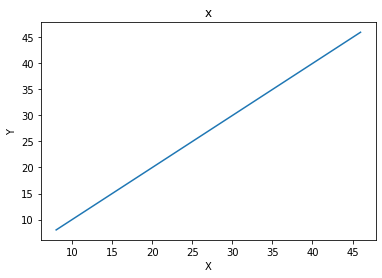

╒═══════════╤═════════════════╤══════════════╕
│ method    │           value │    error [%] │
╞═══════════╪═════════════════╪══════════════╡
│ rectangle │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ trapeze   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ simpson   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ numpy     │ 1026.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════╧══════════════╛


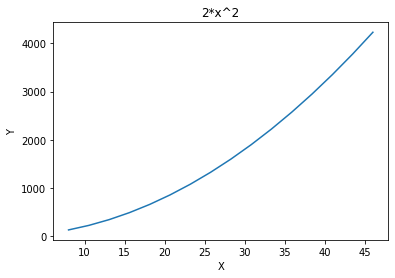

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 64513.6093750000 │ 0.0005534365 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 64620.7812500000 │ 0.0011068730 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 64549.3333333333 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 64549.3333333333 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


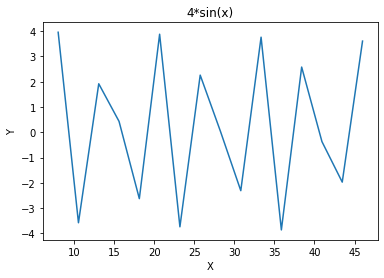

╒═══════════╤══════════════╤══════════════╕
│ method    │        value │    error [%] │
╞═══════════╪══════════════╪══════════════╡
│ rectangle │ 1.4682616705 │ 0.2804105355 │
├───────────┼──────────────┼──────────────┤
│ trapeze   │ 0.5490999575 │ 0.5211525406 │
├───────────┼──────────────┼──────────────┤
│ simpson   │ 1.1618744328 │ 0.0132228434 │
├───────────┼──────────────┼──────────────┤
│ numpy     │ 1.1467116443 │ 0.0000000000 │
╘═══════════╧══════════════╧══════════════╛


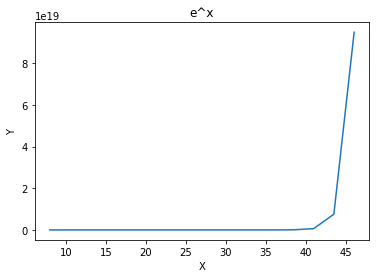

╒═══════════╤══════════════════════════════════╤══════════════╕
│ method    │                            value │    error [%] │
╞═══════════╪══════════════════════════════════╪══════════════╡
│ rectangle │  75837626966786621440.0000000000 │ 0.2013829691 │
├───────────┼──────────────────────────────────┼──────────────┤
│ trapeze   │ 135895587564461129728.0000000000 │ 0.4310644332 │
├───────────┼──────────────────────────────────┼──────────────┤
│ simpson   │  95856947166011457536.0000000000 │ 0.0094328317 │
├───────────┼──────────────────────────────────┼──────────────┤
│ numpy     │  94961194206024433664.0000000000 │ 0.0000000000 │
╘═══════════╧══════════════════════════════════╧══════════════╛


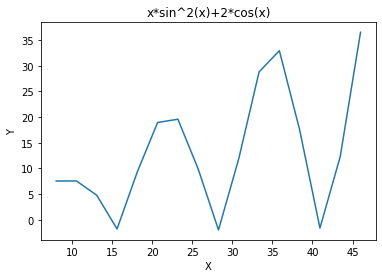

╒═══════════╤════════════════╤══════════════╕
│ method    │          value │    error [%] │
╞═══════════╪════════════════╪══════════════╡
│ rectangle │ 541.8438573471 │ 0.0396651494 │
├───────────┼────────────────┼──────────────┤
│ trapeze   │ 491.7454697438 │ 0.0564613397 │
├───────────┼────────────────┼──────────────┤
│ simpson   │ 525.1443948127 │ 0.0076229864 │
├───────────┼────────────────┼──────────────┤
│ numpy     │ 521.1715114903 │ 0.0000000000 │
╘═══════════╧════════════════╧══════════════╛


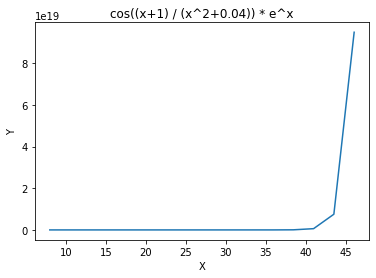

╒═══════════╤══════════════════════════════════╤══════════════╕
│ method    │                            value │    error [%] │
╞═══════════╪══════════════════════════════════╪══════════════╡
│ rectangle │  75817651057061838848.0000000000 │ 0.2013869544 │
├───────────┼──────────────────────────────────┼──────────────┤
│ trapeze   │ 135861333980411363328.0000000000 │ 0.4310735322 │
├───────────┼──────────────────────────────────┼──────────────┤
│ simpson   │  95832212031511674880.0000000000 │ 0.0094332078 │
├───────────┼──────────────────────────────────┼──────────────┤
│ numpy     │  94936654840591450112.0000000000 │ 0.0000000000 │
╘═══════════╧══════════════════════════════════╧══════════════╛


In [13]:
calculate_integral(f1, 8, 46, 16, 'x')
calculate_integral(f2, 8, 46, 16, '2*x^2')
calculate_integral(f3, 8, 46, 16, '4*sin(x)')
calculate_integral(f4, 8, 46, 16, 'e^x')
calculate_integral(f5, 8, 46, 16, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 8, 46, 16, 'cos((x+1) / (x^2+0.04)) * e^x')

przedział [8,46], ilość podziałów: 64

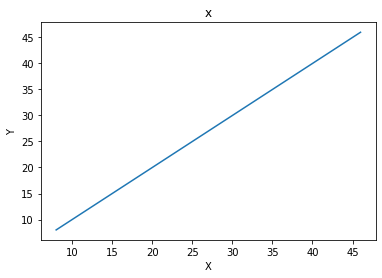

╒═══════════╤═════════════════╤══════════════╕
│ method    │           value │    error [%] │
╞═══════════╪═════════════════╪══════════════╡
│ rectangle │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ trapeze   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ simpson   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ numpy     │ 1026.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════╧══════════════╛


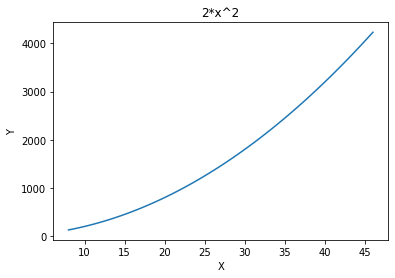

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 64547.1005859375 │ 0.0000345898 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 64553.7988281250 │ 0.0000691796 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 64549.3333333334 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 64549.3333333333 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


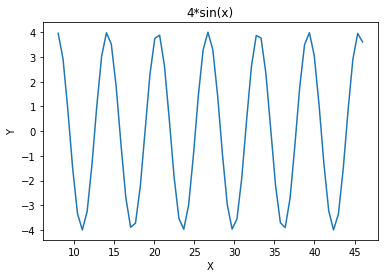

╒═══════════╤══════════════╤══════════════╕
│ method    │        value │    error [%] │
╞═══════════╪══════════════╪══════════════╡
│ rectangle │ 1.1637306607 │ 0.0148415833 │
├───────────┼──────────────┼──────────────┤
│ trapeze   │ 1.1128236395 │ 0.0295523334 │
├───────────┼──────────────┼──────────────┤
│ simpson   │ 1.1467616537 │ 0.0000436111 │
├───────────┼──────────────┼──────────────┤
│ numpy     │ 1.1467116443 │ 0.0000000000 │
╘═══════════╧══════════════╧══════════════╛


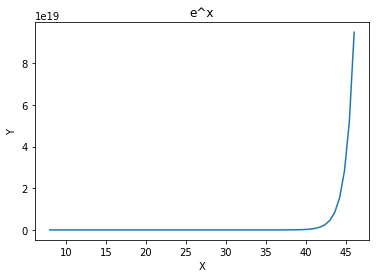

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 93580507884337102848.0000000000 │ 0.0145394793 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 97734732934927089664.0000000000 │ 0.0292070751 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94965249567867109376.0000000000 │ 0.0000427055 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94961194206024433664.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


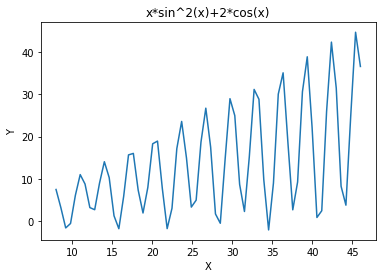

╒═══════════╤════════════════╤══════════════╕
│ method    │          value │    error [%] │
╞═══════════╪════════════════╪══════════════╡
│ rectangle │ 521.6855697910 │ 0.0009863515 │
├───────────┼────────────────┼──────────────┤
│ trapeze   │ 520.1617804230 │ 0.0019374257 │
├───────────┼────────────────┼──────────────┤
│ simpson   │ 521.1776400017 │ 0.0000117591 │
├───────────┼────────────────┼──────────────┤
│ numpy     │ 521.1715114903 │ 0.0000000000 │
╘═══════════╧════════════════╧══════════════╛


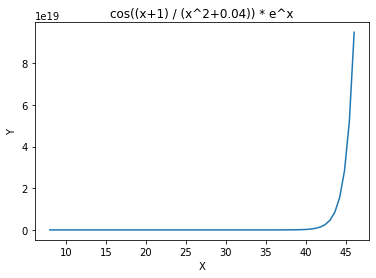

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 93556294238040195072.0000000000 │ 0.0145398066 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 97709539502019166208.0000000000 │ 0.0292077351 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94940709326033190912.0000000000 │ 0.0000427073 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94936654840591450112.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


In [14]:
calculate_integral(f1, 8, 46, 64, 'x')
calculate_integral(f2, 8, 46, 64, '2*x^2')
calculate_integral(f3, 8, 46, 64, '4*sin(x)')
calculate_integral(f4, 8, 46, 64, 'e^x')
calculate_integral(f5, 8, 46, 64, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 8, 46, 64, 'cos((x+1) / (x^2+0.04)) * e^x')

przedział [8,46], ilość podziałów: 256

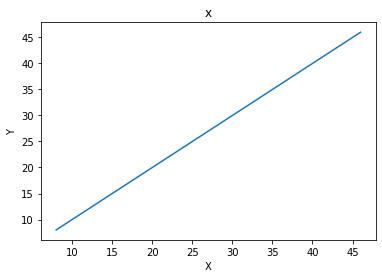

╒═══════════╤═════════════════╤══════════════╕
│ method    │           value │    error [%] │
╞═══════════╪═════════════════╪══════════════╡
│ rectangle │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ trapeze   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ simpson   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ numpy     │ 1026.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════╧══════════════╛


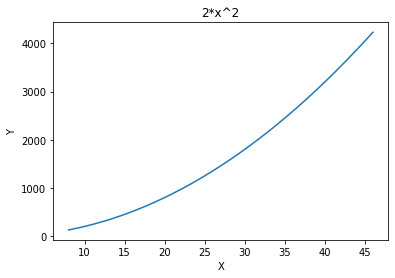

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 64549.1937866211 │ 0.0000021619 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 64549.6124267578 │ 0.0000043237 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 64549.3333333334 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 64549.3333333333 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


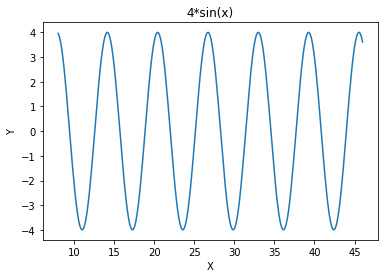

╒═══════════╤══════════════╤══════════════╕
│ method    │        value │    error [%] │
╞═══════════╪══════════════╪══════════════╡
│ rectangle │ 1.1477650834 │ 0.0009186608 │
├───────────┼──────────────┼──────────────┤
│ trapeze   │ 1.1446053465 │ 0.0018368156 │
├───────────┼──────────────┼──────────────┤
│ simpson   │ 1.1467118377 │ 0.0000001687 │
├───────────┼──────────────┼──────────────┤
│ numpy     │ 1.1467116443 │ 0.0000000000 │
╘═══════════╧══════════════╧══════════════╛


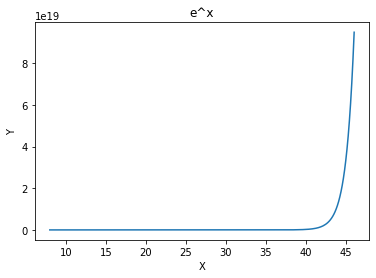

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 94874069131660918784.0000000000 │ 0.0009174808 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 95135492346297155584.0000000000 │ 0.0018354670 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94961210203206320128.0000000000 │ 0.0000001685 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94961194206024433664.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


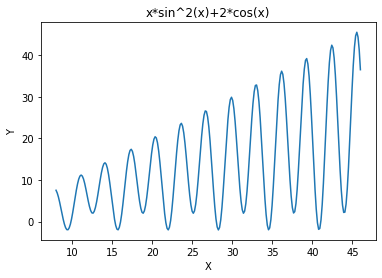

╒═══════════╤════════════════╤══════════════╕
│ method    │          value │    error [%] │
╞═══════════╪════════════════╪══════════════╡
│ rectangle │ 521.2023864757 │ 0.0000592415 │
├───────────┼────────────────┼──────────────┤
│ trapeze   │ 521.1098304896 │ 0.0001183507 │
├───────────┼────────────────┼──────────────┤
│ simpson   │ 521.1715344803 │ 0.0000000441 │
├───────────┼────────────────┼──────────────┤
│ numpy     │ 521.1715114903 │ 0.0000000000 │
╘═══════════╧════════════════╧══════════════╛


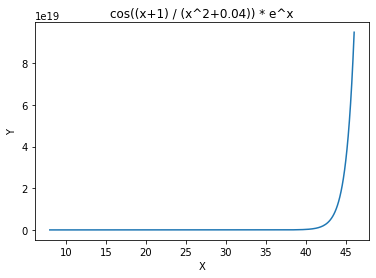

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 94849550303506595840.0000000000 │ 0.0009175016 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 95110911895943479296.0000000000 │ 0.0018355087 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94936670834318868480.0000000000 │ 0.0000001685 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94936654840591450112.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


In [15]:
calculate_integral(f1, 8, 46, 256, 'x')
calculate_integral(f2, 8, 46, 256, '2*x^2')
calculate_integral(f3, 8, 46, 256, '4*sin(x)')
calculate_integral(f4, 8, 46, 256, 'e^x')
calculate_integral(f5, 8, 46, 256, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 8, 46, 256, 'cos((x+1) / (x^2+0.04)) * e^x')

przedział [-8,46], ilość podziałów: 312

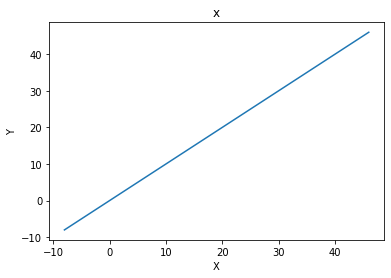

╒═══════════╤═════════════════╤══════════════╕
│ method    │           value │    error [%] │
╞═══════════╪═════════════════╪══════════════╡
│ rectangle │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ trapeze   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ simpson   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ numpy     │ 1026.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════╧══════════════╛


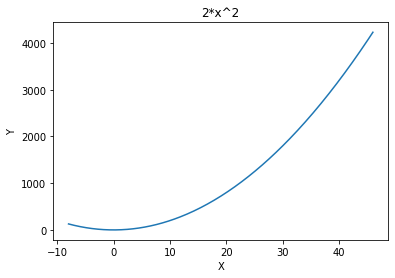

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 65231.7303994083 │ 0.0000041329 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 65232.5392011834 │ 0.0000082659 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 65232.0000000000 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 65232.0000000000 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


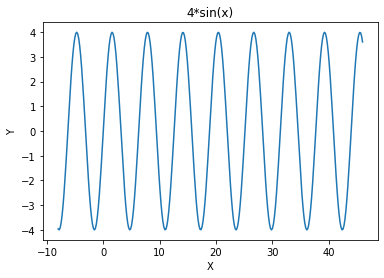

╒═══════════╤══════════════╤══════════════╕
│ method    │        value │    error [%] │
╞═══════════╪══════════════╪══════════════╡
│ rectangle │ 1.1481441650 │ 0.0012492423 │
├───────────┼──────────────┼──────────────┤
│ trapeze   │ 1.1438476758 │ 0.0024975490 │
├───────────┼──────────────┼──────────────┤
│ simpson   │ 1.1467120019 │ 0.0000003119 │
├───────────┼──────────────┼──────────────┤
│ numpy     │ 1.1467116443 │ 0.0000000000 │
╘═══════════╧══════════════╧══════════════╛


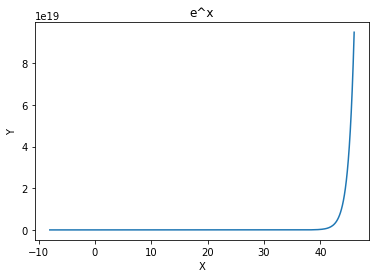

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 94842771782224396288.0000000000 │ 0.0012470612 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 95198127737474252800.0000000000 │ 0.0024950564 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94961223767307681792.0000000000 │ 0.0000003113 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94961194206024531968.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


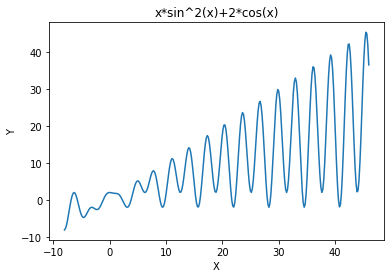

╒═══════════╤════════════════╤══════════════╕
│ method    │          value │    error [%] │
╞═══════════╪════════════════╪══════════════╡
│ rectangle │ 525.1759034037 │ 0.0000894236 │
├───────────┼────────────────┼──────────────┤
│ trapeze   │ 525.0351579276 │ 0.0001785972 │
├───────────┼────────────────┼──────────────┤
│ simpson   │ 525.1289882450 │ 0.0000000833 │
├───────────┼────────────────┼──────────────┤
│ numpy     │ 525.1289444767 │ 0.0000000000 │
╘═══════════╧════════════════╧══════════════╛


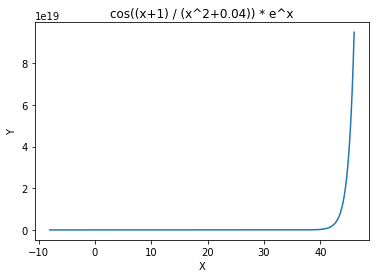

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 94818260332078039040.0000000000 │ 0.0012470895 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 95173532522317201408.0000000000 │ 0.0024951130 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94936684395491098624.0000000000 │ 0.0000003113 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94936654840591548416.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


In [17]:
calculate_integral(f1, -8, 46, 312, 'x')
calculate_integral(f2, -8, 46, 312, '2*x^2')
calculate_integral(f3, -8, 46, 312, '4*sin(x)')
calculate_integral(f4, -8, 46, 312, 'e^x')
calculate_integral(f5, -8, 46, 312, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, -8, 46, 312, 'cos((x+1) / (x^2+0.04)) * e^x')

przedział [-8,46], ilość podziałów: 1024

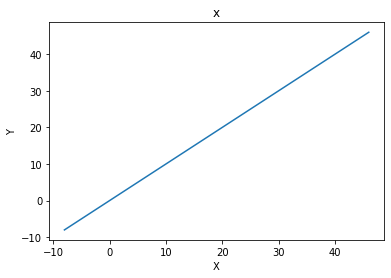

╒═══════════╤═════════════════╤══════════════╕
│ method    │           value │    error [%] │
╞═══════════╪═════════════════╪══════════════╡
│ rectangle │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ trapeze   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ simpson   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ numpy     │ 1026.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════╧══════════════╛


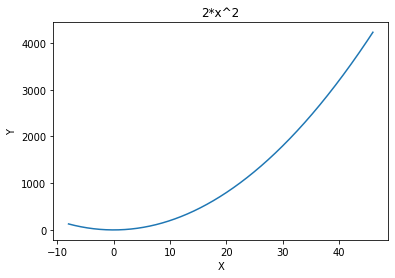

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 65231.9749717712 │ 0.0000003837 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 65232.0500564575 │ 0.0000007674 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 65232.0000000000 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 65232.0000000000 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


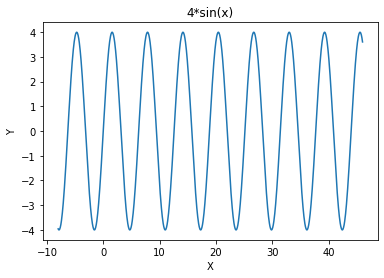

╒═══════════╤══════════════╤══════════════╕
│ method    │        value │    error [%] │
╞═══════════╪══════════════╪══════════════╡
│ rectangle │ 1.1468445262 │ 0.0001158808 │
├───────────┼──────────────┼──────────────┤
│ trapeze   │ 1.1464458898 │ 0.0002317536 │
├───────────┼──────────────┼──────────────┤
│ simpson   │ 1.1467116474 │ 0.0000000027 │
├───────────┼──────────────┼──────────────┤
│ numpy     │ 1.1467116443 │ 0.0000000000 │
╘═══════════╧══════════════╧══════════════╛


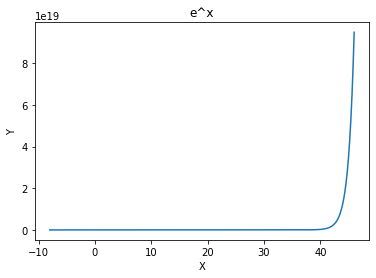

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 94950191809121566720.0000000000 │ 0.0001158620 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 94983199764747141120.0000000000 │ 0.0002317321 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94961194460996730880.0000000000 │ 0.0000000027 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94961194206024531968.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


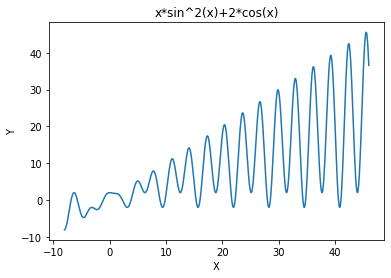

╒═══════════╤════════════════╤══════════════╕
│ method    │          value │    error [%] │
╞═══════════╪════════════════╪══════════════╡
│ rectangle │ 525.1332909844 │ 0.0000082770 │
├───────────┼────────────────┼──────────────┤
│ trapeze   │ 525.1202525894 │ 0.0000165519 │
├───────────┼────────────────┼──────────────┤
│ simpson   │ 525.1289448527 │ 0.0000000007 │
├───────────┼────────────────┼──────────────┤
│ numpy     │ 525.1289444767 │ 0.0000000000 │
╘═══════════╧════════════════╧══════════════╛


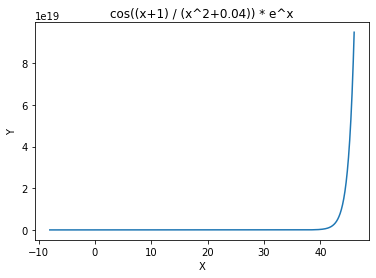

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 94925655037071147008.0000000000 │ 0.0001158647 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 94958655212383846400.0000000000 │ 0.0002317374 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94936655095508713472.0000000000 │ 0.0000000027 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94936654840591548416.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


In [18]:
calculate_integral(f1, -8, 46, 1024, 'x')
calculate_integral(f2, -8, 46, 1024, '2*x^2')
calculate_integral(f3, -8, 46, 1024, '4*sin(x)')
calculate_integral(f4, -8, 46, 1024, 'e^x')
calculate_integral(f5, -8, 46, 1024, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, -8, 46, 1024, 'cos((x+1) / (x^2+0.04)) * e^x')

przedział [-8,46], ilość podziałów: 4096

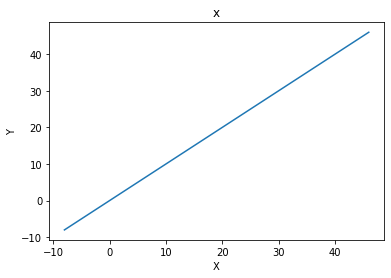

╒═══════════╤═════════════════╤══════════════╕
│ method    │           value │    error [%] │
╞═══════════╪═════════════════╪══════════════╡
│ rectangle │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ trapeze   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ simpson   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ numpy     │ 1026.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════╧══════════════╛


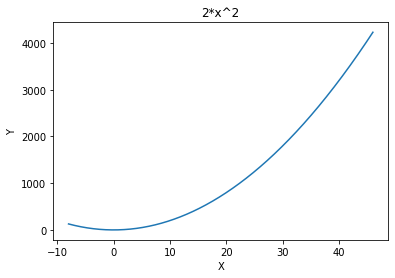

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 65231.9984357357 │ 0.0000000240 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 65232.0031285286 │ 0.0000000480 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 65232.0000000000 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 65232.0000000000 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


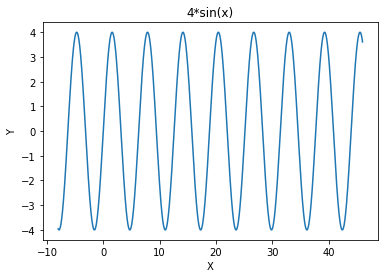

╒═══════════╤══════════════╤══════════════╕
│ method    │        value │    error [%] │
╞═══════════╪══════════════╪══════════════╡
│ rectangle │ 1.1467199488 │ 0.0000072420 │
├───────────┼──────────────┼──────────────┤
│ trapeze   │ 1.1466950354 │ 0.0000144840 │
├───────────┼──────────────┼──────────────┤
│ simpson   │ 1.1467116443 │ 0.0000000000 │
├───────────┼──────────────┼──────────────┤
│ numpy     │ 1.1467116443 │ 0.0000000000 │
╘═══════════╧══════════════╧══════════════╛


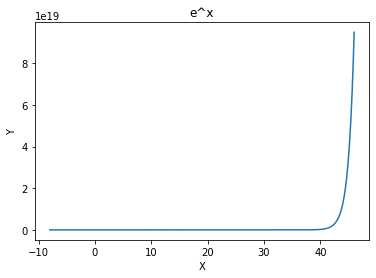

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 94960506503928561664.0000000000 │ 0.0000072419 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 94962569613204488192.0000000000 │ 0.0000144839 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94961194207020597248.0000000000 │ 0.0000000000 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94961194206024531968.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


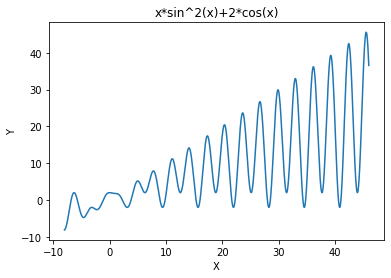

╒═══════════╤════════════════╤══════════════╕
│ method    │          value │    error [%] │
╞═══════════╪════════════════╪══════════════╡
│ rectangle │ 525.1292160564 │ 0.0000005172 │
├───────────┼────────────────┼──────────────┤
│ trapeze   │ 525.1284013219 │ 0.0000010343 │
├───────────┼────────────────┼──────────────┤
│ simpson   │ 525.1289444782 │ 0.0000000000 │
├───────────┼────────────────┼──────────────┤
│ numpy     │ 525.1289444767 │ 0.0000000000 │
╘═══════════╧════════════════╧══════════════╛


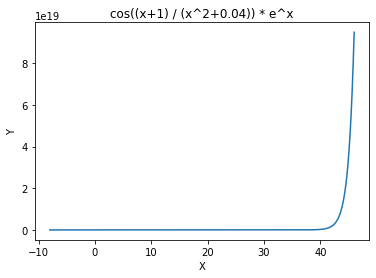

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 94935967300593238016.0000000000 │ 0.0000072421 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 94938029923575463936.0000000000 │ 0.0000144842 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94936654841587318784.0000000000 │ 0.0000000000 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94936654840591548416.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


In [19]:
calculate_integral(f1, -8, 46, 4096, 'x')
calculate_integral(f2, -8, 46, 4096, '2*x^2')
calculate_integral(f3, -8, 46, 4096, '4*sin(x)')
calculate_integral(f4, -8, 46, 4096, 'e^x')
calculate_integral(f5, -8, 46, 4096, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, -8, 46, 4096, 'cos((x+1) / (x^2+0.04)) * e^x')

przedział [-8,46], ilość podziałów: 8656

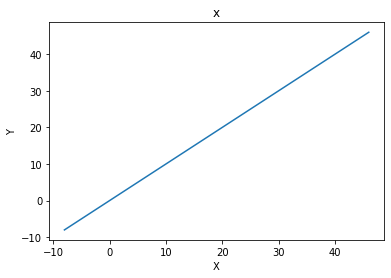

╒═══════════╤═════════════════╤══════════════╕
│ method    │           value │    error [%] │
╞═══════════╪═════════════════╪══════════════╡
│ rectangle │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ trapeze   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ simpson   │ 1026.0000000000 │ 0.0000000000 │
├───────────┼─────────────────┼──────────────┤
│ numpy     │ 1026.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════╧══════════════╛


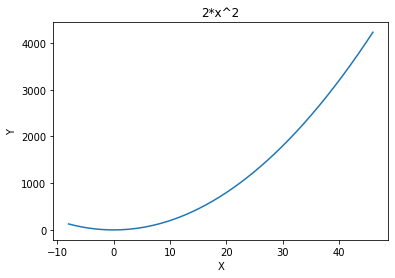

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 65231.9996497359 │ 0.0000000054 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 65232.0007005281 │ 0.0000000107 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 65232.0000000000 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 65232.0000000000 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


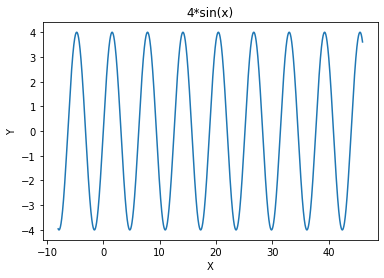

╒═══════════╤══════════════╤══════════════╕
│ method    │        value │    error [%] │
╞═══════════╪══════════════╪══════════════╡
│ rectangle │ 1.1467135038 │ 0.0000016216 │
├───────────┼──────────────┼──────────────┤
│ trapeze   │ 1.1467079253 │ 0.0000032432 │
├───────────┼──────────────┼──────────────┤
│ simpson   │ 1.1467116443 │ 0.0000000000 │
├───────────┼──────────────┼──────────────┤
│ numpy     │ 1.1467116443 │ 0.0000000000 │
╘═══════════╧══════════════╧══════════════╛


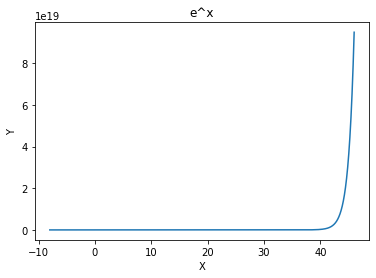

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 94961040217819168768.0000000000 │ 0.0000016216 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 94961502182584614912.0000000000 │ 0.0000032432 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94961194206074290176.0000000000 │ 0.0000000000 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94961194206024531968.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


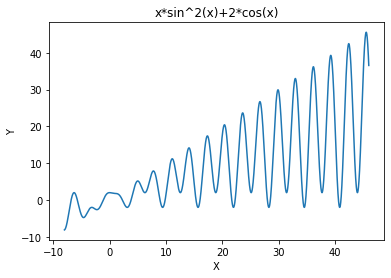

╒═══════════╤════════════════╤══════════════╕
│ method    │          value │    error [%] │
╞═══════════╪════════════════╪══════════════╡
│ rectangle │ 525.1290052869 │ 0.0000001158 │
├───────────┼────────────────┼──────────────┤
│ trapeze   │ 525.1288228566 │ 0.0000002316 │
├───────────┼────────────────┼──────────────┤
│ simpson   │ 525.1289444768 │ 0.0000000000 │
├───────────┼────────────────┼──────────────┤
│ numpy     │ 525.1289444767 │ 0.0000000000 │
╘═══════════╧════════════════╧══════════════╛


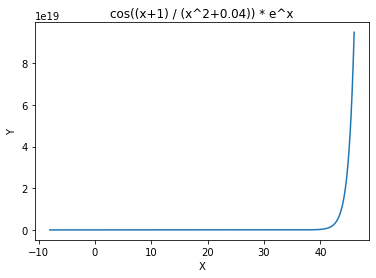

╒═══════════╤═════════════════════════════════╤══════════════╕
│ method    │                           value │    error [%] │
╞═══════════╪═════════════════════════════════╪══════════════╡
│ rectangle │ 94936500888682561536.0000000000 │ 0.0000016216 │
├───────────┼─────────────────────────────────┼──────────────┤
│ trapeze   │ 94936962744558780416.0000000000 │ 0.0000032433 │
├───────────┼─────────────────────────────────┼──────────────┤
│ simpson   │ 94936654840641224704.0000000000 │ 0.0000000000 │
├───────────┼─────────────────────────────────┼──────────────┤
│ numpy     │ 94936654840591548416.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════════════════╧══════════════╛


In [20]:
calculate_integral(f1, -8, 46, 8656, 'x')
calculate_integral(f2, -8, 46, 8656, '2*x^2')
calculate_integral(f3, -8, 46, 8656, '4*sin(x)')
calculate_integral(f4, -8, 46, 8656, 'e^x')
calculate_integral(f5, -8, 46, 8656, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, -8, 46, 8656, 'cos((x+1) / (x^2+0.04)) * e^x')

przedział [69,420], ilość podziałów: 2137

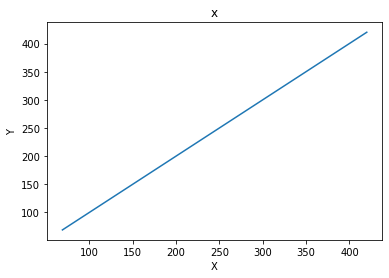

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 85819.5000000000 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 85819.5000000000 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 85819.5000000000 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 85819.5000000000 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


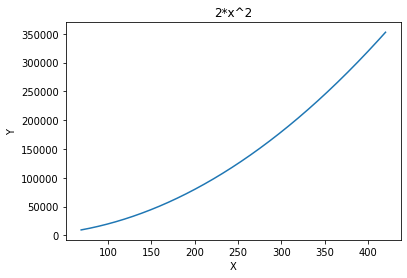

╒═══════════╤═════════════════════╤══════════════╕
│ method    │               value │    error [%] │
╞═══════════╪═════════════════════╪══════════════╡
│ rectangle │ 49172992.4218036532 │ 0.0000000321 │
├───────────┼─────────────────────┼──────────────┤
│ trapeze   │ 49172997.1563929170 │ 0.0000000642 │
├───────────┼─────────────────────┼──────────────┤
│ simpson   │ 49172994.0000000149 │ 0.0000000000 │
├───────────┼─────────────────────┼──────────────┤
│ numpy     │ 49172994.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════╧══════════════╛


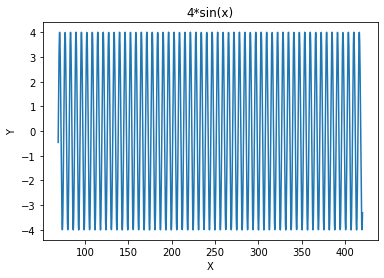

╒═══════════╤══════════════╤══════════════╕
│ method    │        value │    error [%] │
╞═══════════╪══════════════╪══════════════╡
│ rectangle │ 1.7255854456 │ 0.0011249566 │
├───────────┼──────────────┼──────────────┤
│ trapeze   │ 1.7197696709 │ 0.0022491545 │
├───────────┼──────────────┼──────────────┤
│ simpson   │ 1.7236468540 │ 0.0000002529 │
├───────────┼──────────────┼──────────────┤
│ numpy     │ 1.7236464181 │ 0.0000000000 │
╘═══════════╧══════════════╧══════════════╛


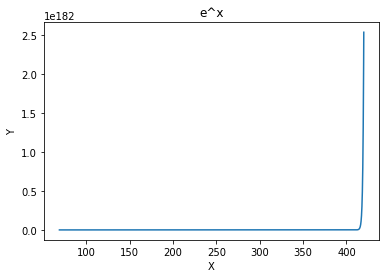

╒═══════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════╕
│ method    │                                                                                                                                                                                              value │    error [%] │
╞═══════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════╡
│ rectangle │ 253043001868601334124717930329837879822341166758788247988294399034008752794000455051625177933951211730095793867650262677347093368646084141402805242105539154164206238090382002352029696.0000000000 │ 0.0011231877 │
├───────────┼───────────────────────────────────────────────────────────────────────────────────

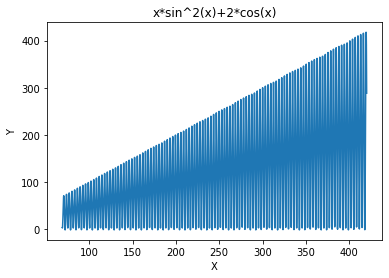

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 43002.6435071823 │ 0.0000097763 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 43001.3834336678 │ 0.0000195262 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 43002.2234826774 │ 0.0000000088 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 43002.2231048827 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


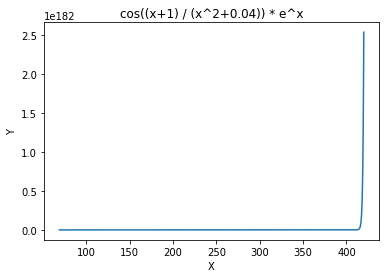

╒═══════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════╕
│ method    │                                                                                                                                                                                              value │    error [%] │
╞═══════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════╡
│ rectangle │ 253042277735205741948738246751315012388916275949306691764744425074433670959710521761031032001100986488774510927908220638418772181095593343174131130957711614072268995720655190559293440.0000000000 │ 0.0011231877 │
├───────────┼───────────────────────────────────────────────────────────────────────────────────

In [21]:
calculate_integral(f1, 69, 420, 2137, 'x')
calculate_integral(f2, 69, 420, 2137, '2*x^2')
calculate_integral(f3, 69, 420, 2137, '4*sin(x)')
calculate_integral(f4, 69, 420, 2137, 'e^x')
calculate_integral(f5, 69, 420, 2137, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 69, 420, 2137, 'cos((x+1) / (x^2+0.04)) * e^x')

przedział [69,420], ilość podziałów: 46902

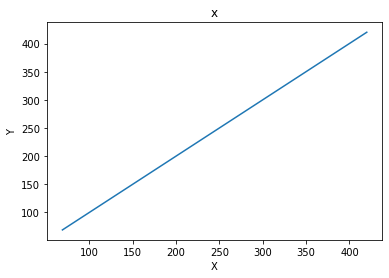

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 85819.5000000001 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 85819.5000000001 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 85819.5000000001 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 85819.5000000000 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


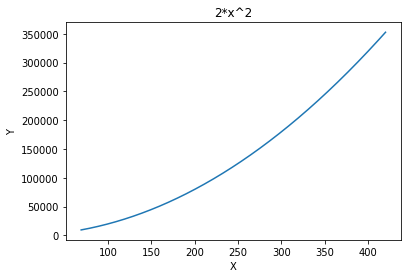

╒═══════════╤═════════════════════╤══════════════╕
│ method    │               value │    error [%] │
╞═══════════╪═════════════════════╪══════════════╡
│ rectangle │ 49172993.9967234805 │ 0.0000000001 │
├───────────┼─────────────────────┼──────────────┤
│ trapeze   │ 49172994.0065527558 │ 0.0000000001 │
├───────────┼─────────────────────┼──────────────┤
│ simpson   │ 49172994.0000000894 │ 0.0000000000 │
├───────────┼─────────────────────┼──────────────┤
│ numpy     │ 49172994.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════╧══════════════╛


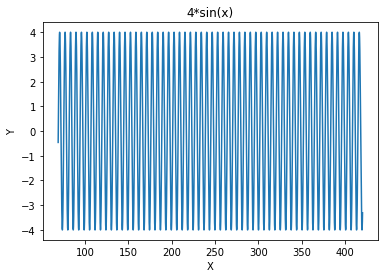

╒═══════════╤══════════════╤══════════════╕
│ method    │        value │    error [%] │
╞═══════════╪══════════════╪══════════════╡
│ rectangle │ 1.7236504403 │ 0.0000023336 │
├───────────┼──────────────┼──────────────┤
│ trapeze   │ 1.7236383736 │ 0.0000046671 │
├───────────┼──────────────┼──────────────┤
│ simpson   │ 1.7236464181 │ 0.0000000000 │
├───────────┼──────────────┼──────────────┤
│ numpy     │ 1.7236464181 │ 0.0000000000 │
╘═══════════╧══════════════╧══════════════╛


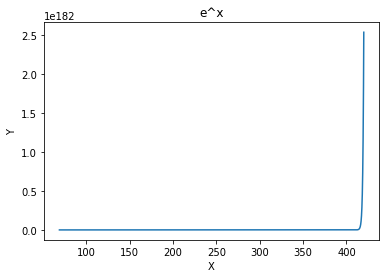

╒═══════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════╕
│ method    │                                                                                                                                                                                              value │    error [%] │
╞═══════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════╡
│ rectangle │ 253326945080273652395476584832718920557124927270416516130657478179536974013855931518503088562664072261319362618558495829786407044526411130362509138955046524807069589189871415850958848.0000000000 │ 0.0000023336 │
├───────────┼───────────────────────────────────────────────────────────────────────────────────

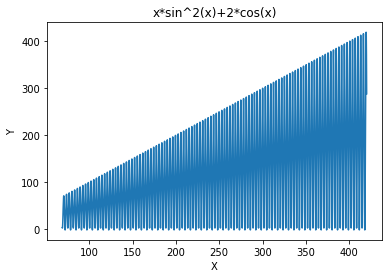

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 43002.2239748976 │ 0.0000000202 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 43002.2213648581 │ 0.0000000405 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 43002.2231048844 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 43002.2231048827 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


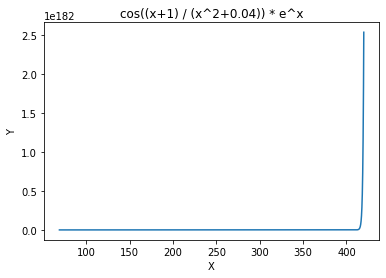

╒═══════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════╕
│ method    │                                                                                                                                                                                              value │    error [%] │
╞═══════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════╡
│ rectangle │ 253326220142067894971282323023204352255531188007096085621076746389171822334146757954112663797397346043894953803176113195225326959808382992994631845313243119528921508798639415893164032.0000000000 │ 0.0000023336 │
├───────────┼───────────────────────────────────────────────────────────────────────────────────

In [22]:
calculate_integral(f1, 69, 420, 46902, 'x')
calculate_integral(f2, 69, 420, 46902, '2*x^2')
calculate_integral(f3, 69, 420, 46902, '4*sin(x)')
calculate_integral(f4, 69, 420, 46902, 'e^x')
calculate_integral(f5, 69, 420, 46902, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 69, 420, 46902, 'cos((x+1) / (x^2+0.04)) * e^x')

przedział [69,420], ilość podziałów: 246782

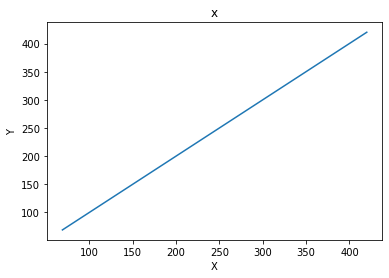

╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 85819.5000000000 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 85819.5000000000 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 85819.5000000000 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 85819.5000000000 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


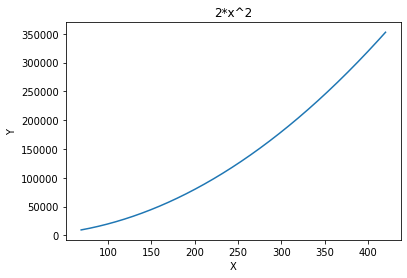

╒═══════════╤═════════════════════╤══════════════╕
│ method    │               value │    error [%] │
╞═══════════╪═════════════════════╪══════════════╡
│ rectangle │ 49172993.9998815209 │ 0.0000000000 │
├───────────┼─────────────────────┼──────────────┤
│ trapeze   │ 49172994.0002372563 │ 0.0000000000 │
├───────────┼─────────────────────┼──────────────┤
│ simpson   │ 49172993.9999999255 │ 0.0000000000 │
├───────────┼─────────────────────┼──────────────┤
│ numpy     │ 49172994.0000000000 │ 0.0000000000 │
╘═══════════╧═════════════════════╧══════════════╛


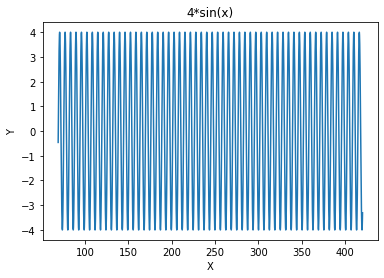

╒═══════════╤══════════════╤══════════════╕
│ method    │        value │    error [%] │
╞═══════════╪══════════════╪══════════════╡
│ rectangle │ 1.7236465634 │ 0.0000000843 │
├───────────┼──────────────┼──────────────┤
│ trapeze   │ 1.7236461275 │ 0.0000001686 │
├───────────┼──────────────┼──────────────┤
│ simpson   │ 1.7236464181 │ 0.0000000000 │
├───────────┼──────────────┼──────────────┤
│ numpy     │ 1.7236464181 │ 0.0000000000 │
╘═══════════╧══════════════╧══════════════╛


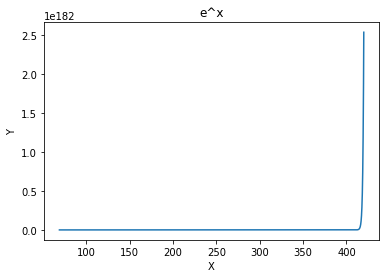

╒═══════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════╕
│ method    │                                                                                                                                                                                              value │    error [%] │
╞═══════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════╡
│ rectangle │ 253327514883099822609542863065002474479595143951138733253472492518457121918504740507603447439542873254426069775066164307465127380922958645357687014711597936748664076571059955269894144.0000000000 │ 0.0000000843 │
├───────────┼───────────────────────────────────────────────────────────────────────────────────

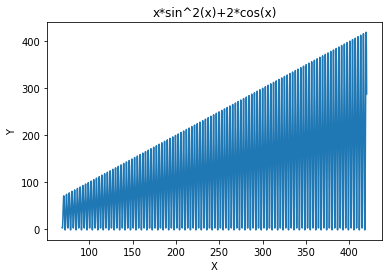

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


╒═══════════╤══════════════════╤══════════════╕
│ method    │            value │    error [%] │
╞═══════════╪══════════════════╪══════════════╡
│ rectangle │ 43002.2231363078 │ 0.0000000007 │
├───────────┼──────────────────┼──────────────┤
│ trapeze   │ 43002.2230420325 │ 0.0000000015 │
├───────────┼──────────────────┼──────────────┤
│ simpson   │ 43002.2231048820 │ 0.0000000000 │
├───────────┼──────────────────┼──────────────┤
│ numpy     │ 43002.2231048827 │ 0.0000000000 │
╘═══════════╧══════════════════╧══════════════╛


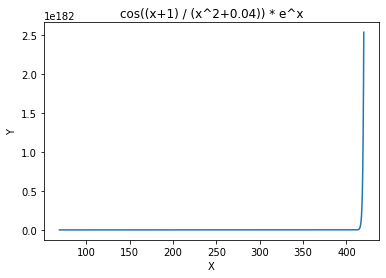

╒═══════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════╕
│ method    │                                                                                                                                                                                              value │    error [%] │
╞═══════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════╡
│ rectangle │ 253326789943278868235687869393312149591628753544207281038447593231628647320513881139586720342909098644355703908094276043834240226272905256683586752397943121383312980909021696133955584.0000000000 │ 0.0000000843 │
├───────────┼───────────────────────────────────────────────────────────────────────────────────

In [23]:
calculate_integral(f1, 69, 420, 246782, 'x')
calculate_integral(f2, 69, 420, 246782, '2*x^2')
calculate_integral(f3, 69, 420, 246782, '4*sin(x)')
calculate_integral(f4, 69, 420, 246782, 'e^x')
calculate_integral(f5, 69, 420, 246782, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 69, 420, 246782, 'cos((x+1) / (x^2+0.04)) * e^x')